In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the image size and batch size
image_size = (224, 224)
batch_size = 32

# Create ImageDataGenerators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'M:/projects/Major_proj/Fruits_Dataset/Mango/data/train',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)

validation_generator = test_datagen.flow_from_directory(
    'M:/projects/Major_proj/Fruits_Dataset/Mango/data/test',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)


Found 3999 images belonging to 2 classes.
Found 756 images belonging to 2 classes.


In [2]:
from tensorflow.keras.applications import VGG16, MobileNetV2, ResNet50
from vit_keras import vit
from tensorflow.keras.layers import Input, Dense, Dropout, GlobalAveragePooling2D, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Function to build the model
def build_model(base_model):
    base_model.trainable = False
    inputs = Input(shape=(224, 224, 3))
    x = base_model(inputs, training=False)
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# VGG16 model
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
vgg_model = build_model(vgg_base)

# MobileNetV2 model
mobilenet_base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
mobilenet_model = build_model(mobilenet_base)

# ResNet50 model
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
resnet_model = build_model(resnet_base)

# Vision Transformer model
vit_model = vit.vit_b16(
    image_size=224,
    pretrained=True,
    include_top=False,
    pretrained_top=False
)

vit_inputs = Input(shape=(224, 224, 3))
x = vit_model(vit_inputs)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
vit_outputs = Dense(1, activation='sigmoid')(x)
vit_model = Model(vit_inputs, vit_outputs)
vit_model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


c:\Users\MANSI\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
c:\Users\MANSI\AppData\Local\Programs\Python\Python311\Lib\site-packages\vit_keras\utils.py:81: UserWarning: Resizing position embeddings from 24, 24 to 14, 14
  warnings.warn(


In [3]:
# Train and evaluate models
models = {
    "VGG16": vgg_model,
    "MobileNetV2": mobilenet_model,
    "ResNet50": resnet_model,
    "VisionTransformer": vit_model
}

history_dict = {}
results = {}

for name, model in models.items():
    print(f"Training {name}...")
    history = model.fit(train_generator, validation_data=validation_generator, epochs=5)
    history_dict[name] = history
    results[name] = {
        "accuracy": history.history['accuracy'][-1],
        "val_accuracy": history.history['val_accuracy'][-1],
        "loss": history.history['loss'][-1],
        "val_loss": history.history['val_loss'][-1]
    }


Training VGG16...
Epoch 1/5
125/125 [==============================] - 645s 5s/step - loss: 0.0090 - accuracy: 0.9970 - val_loss: 2.2926e-06 - val_accuracy: 1.0000
Epoch 2/5
125/125 [==============================] - 806s 6s/step - loss: 1.5556e-06 - accuracy: 1.0000 - val_loss: 2.1441e-07 - val_accuracy: 1.0000
Epoch 3/5
125/125 [==============================] - 738s 6s/step - loss: 6.5536e-07 - accuracy: 1.0000 - val_loss: 4.5729e-08 - val_accuracy: 1.0000
Epoch 4/5
125/125 [==============================] - 560s 4s/step - loss: 2.7409e-07 - accuracy: 1.0000 - val_loss: 1.9523e-08 - val_accuracy: 1.0000
Epoch 5/5
125/125 [==============================] - 626s 5s/step - loss: 3.2524e-07 - accuracy: 1.0000 - val_loss: 8.4919e-09 - val_accuracy: 1.0000
Training MobileNetV2...
Epoch 1/5
125/125 [==============================] - 70s 541ms/step - loss: 0.0069 - accuracy: 0.9957 - val_loss: 5.7599e-16 - val_accuracy: 1.0000
Epoch 2/5
125/125 [==============================] - 69s 553ms/s

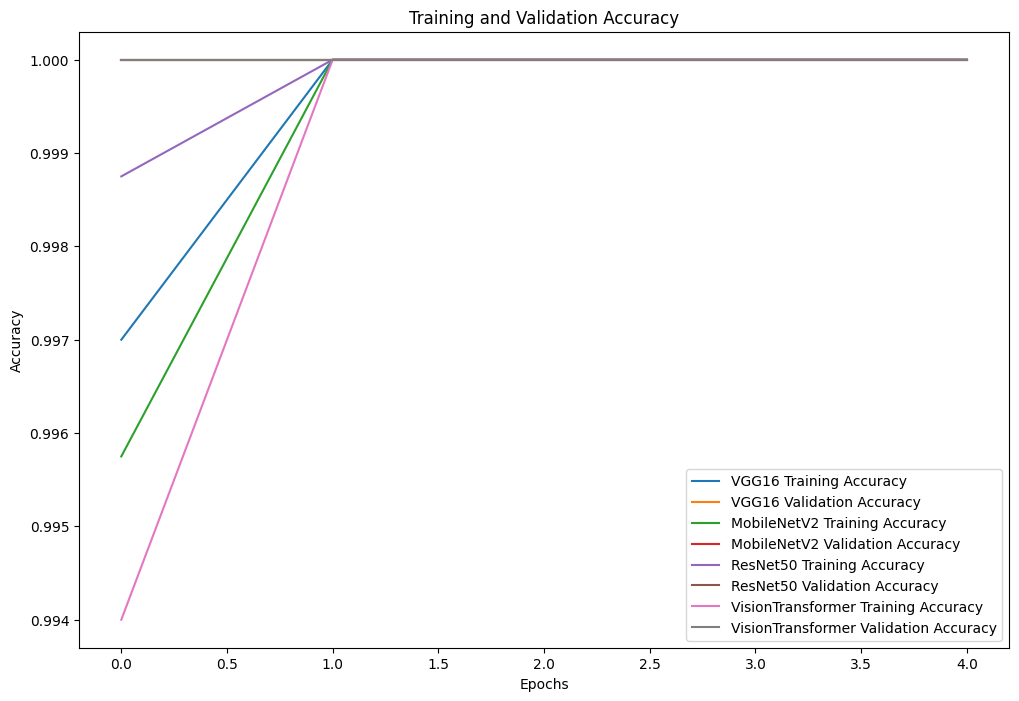

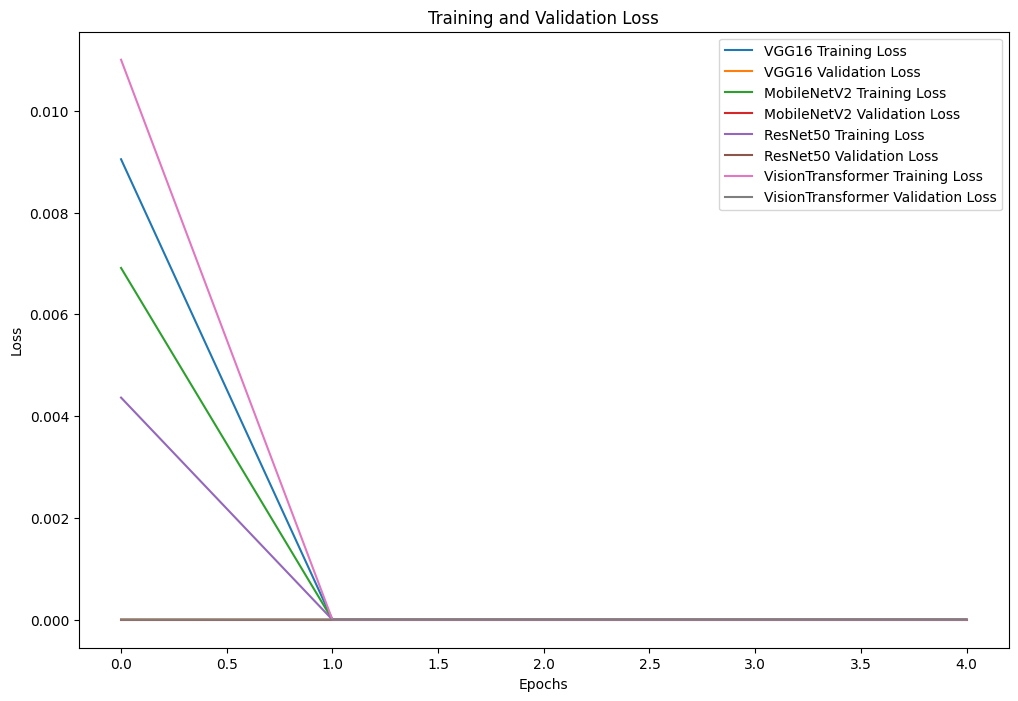

NameError: name 'model_names' is not defined

<Figure size 1000x600 with 0 Axes>

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Plot learning curves
plt.figure(figsize=(12, 8))

for name, history in history_dict.items():
    plt.plot(history.history['accuracy'], label=f'{name} Training Accuracy')
    plt.plot(history.history['val_accuracy'], label=f'{name} Validation Accuracy')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(12, 8))

for name, history in history_dict.items():
    plt.plot(history.history['loss'], label=f'{name} Training Loss')
    plt.plot(history.history['val_loss'], label=f'{name} Validation Loss')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 2D Bar Plot
plt.figure(figsize=(10, 6))
x = np.arange(len(model_names))
width = 0.35

plt.bar(x - width/2, train_accuracies, width, label='Training Accuracy')
plt.bar(x + width/2, val_accuracies, width, label='Validation Accuracy')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Comparison')
plt.xticks(x, model_names)
plt.legend()
plt.show()

# 3D Bar Plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

x = np.arange(len(model_names))
y_train = np.zeros(len(model_names))
y_val = np.ones(len(model_names))
z_train = np.zeros(len(model_names))
z_val = np.zeros(len(model_names))

dx = np.ones(len(model_names)) * 0.4
dy = np.ones(len(model_names)) * 0.4
dz_train = train_accuracies
dz_val = val_accuracies

ax.bar3d(x - 0.2, y_train, z_train, dx, dy, dz_train, color='b', label='Training Accuracy')
ax.bar3d(x + 0.2, y_val, z_val, dx, dy, dz_val, color='r', label='Validation Accuracy')

ax.set_xlabel('Models')
ax.set_ylabel('Train/Validation')
ax.set_zlabel('Accuracy')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.set_yticks([0, 1])
ax.set_yticklabels(['Train', 'Validation'])
ax.set_title('3D Bar Plot of Model Accuracies')
ax.legend()

plt.show()

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Evaluate each model and plot confusion matrix
for name, model in models.items():
    print(f"Evaluating {name}...")
    y_pred = model.predict(test_generator)
    y_pred_classes = np.round(y_pred).astype(int)
    y_true = test_generator.classes
    cm = confusion_matrix(y_true, y_pred_classes)
    print(f"Classification Report for {name}:\n", classification_report(y_true, y_pred_classes, target_names=['Unripened', 'Ripened']))
    plot_confusion_matrix(cm, ['Unripened', 'Ripened'], name)
